In [122]:
import pandas as pd 

In [123]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [124]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [125]:
df.duplicated().sum()

24

In [126]:
df=df.drop_duplicates()  

In [127]:
df.duplicated().sum()

0

In [128]:
#df.to_csv("After EDA Lorean.csv",index=False)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [130]:
df.shape

(2087, 17)

In [131]:
drop_cols = ['SMOKE', 'SCC', 'TUE', 'MTRANS']
df = df.drop(columns=drop_cols)

In [132]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,FAF,CALC,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,2.00,0.00,no,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,3.00,3.00,Sometimes,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,2.00,2.00,Frequently,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,2.00,2.00,Frequently,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,2.00,0.00,Sometimes,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,1.73,1.68,Sometimes,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,2.01,1.34,Sometimes,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,2.05,1.41,Sometimes,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,2.85,1.14,Sometimes,Obesity_Type_III


In [133]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'CALC',
       'NObeyesdad'],
      dtype='object')


In [134]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [135]:
df['Gender']=df['Gender'].map({'Male': 0, 'Female': 1})

In [136]:
df['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [137]:
df['family_history_with_overweight']=df['family_history_with_overweight'].map({'yes':0,'no':1})

In [138]:
df['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [139]:
df['FAVC']=df['FAVC'].map({'yes':0,'no':1})

In [140]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [141]:
df['CAEC']=df['CAEC'].map({'Sometimes':0, 'Frequently':1, 'Always':2, 'no':3})

In [142]:
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [143]:
df['CALC']=df['CALC'].map({'Sometimes':0, 'Frequently':1, 'Always':2, 'no':3})

In [144]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [145]:
df['NObeyesdad']=df['NObeyesdad'].map({'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2,
       'Obesity_Type_I':3, 'Insufficient_Weight':4, 'Obesity_Type_II':5,
       'Obesity_Type_III':6})

In [146]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,FAF,CALC,NObeyesdad
0,1,21,1.62,64.00,0,1,2.0,3.0,0,2.00,0.00,3,0
1,1,21,1.52,56.00,0,1,3.0,3.0,0,3.00,3.00,0,0
2,0,23,1.80,77.00,0,1,2.0,3.0,0,2.00,2.00,1,0
3,0,27,1.80,87.00,1,1,3.0,3.0,0,2.00,2.00,1,1
4,0,22,1.78,89.80,1,1,2.0,1.0,0,2.00,0.00,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,21,1.71,131.41,0,0,3.0,3.0,0,1.73,1.68,0,6
2107,1,22,1.75,133.74,0,0,3.0,3.0,0,2.01,1.34,0,6
2108,1,23,1.75,133.69,0,0,3.0,3.0,0,2.05,1.41,0,6
2109,1,24,1.74,133.35,0,0,3.0,3.0,0,2.85,1.14,0,6


In [147]:
from sklearn.model_selection import train_test_split 
x=df.iloc[:,0:-1] 
y=df.iloc[:,-1:] 

In [148]:
y.shape

(2087, 1)

In [149]:
y = y.squeeze() 

In [150]:
y.shape

(2087,)

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) 

In [152]:
x_train.shape

(1460, 12)

In [153]:
y_train.shape

(1460,)

In [154]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)   

In [155]:
from sklearn.linear_model import LogisticRegression  


model = LogisticRegression(max_iter=1000)  
model.fit(x_train_scaled, y_train)  

LogisticRegression(max_iter=1000)

In [157]:
accuracy_score(y_test, y_pred)*100

88.3572567783094

In [201]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix 


y_pred = model.predict(x_test_scaled)  
print("Accuracy:", accuracy_score(y_test, y_pred))  
print("Classification Report:\n", classification_report(y_test, y_pred))  

Accuracy: 0.8835725677830941
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.62      0.74        87
           1       0.68      0.84      0.75        80
           2       0.82      0.82      0.82        83
           3       0.93      0.91      0.92        99
           4       0.89      0.99      0.94        91
           5       0.96      0.98      0.97        84
           6       0.98      1.00      0.99       103

    accuracy                           0.88       627
   macro avg       0.89      0.88      0.88       627
weighted avg       0.89      0.88      0.88       627



In [203]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Confusion Matrix:
[[ 54  20   2   0  11   0   0]
 [  3  67   9   1   0   0   0]
 [  0  10  68   5   0   0   0]
 [  0   1   4  90   0   3   1]
 [  1   0   0   0  90   0   0]
 [  0   0   0   1   0  82   1]
 [  0   0   0   0   0   0 103]]


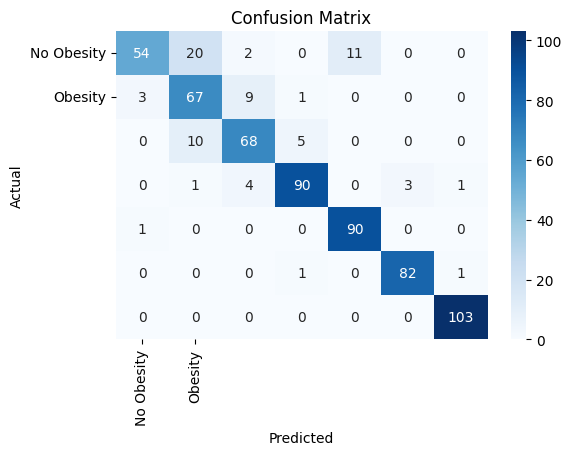

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Obesity", "Obesity"], yticklabels=["No Obesity", "Obesity"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
